# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Setting current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetching current BTC price and displaying data to get CAD conversion price
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18821631,
   'total_supply': 18821631,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 44031.0,
     'volume_24h': 40351785672,
     'market_cap': 830382022713,
     'percentage_change_1h': 1.52885252440729,
     'percentage_change_24h': -7.33580539983802,
     'percentage_change_7d': -4.68530477744942,
     'percent_change_1h': 1.52885252440729,
     'percent_change_24h': -7.33580539983802,
     'percent_change_7d': -4.68530477744942},
    'CAD': {'price': 56421.3234,
     'volume_24h': 51706778160.1008,
     'market_cap': 1064051523904.44,
     'percent_change_1h': 1.52885252440729,
     'percent_change_24h': -7.33580539983802,
     'percent_change_7d': -4.68530477744942}},
   'last_updated': 1632168566}},
 'metadata': {'timestamp': 1632168566,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [6]:
# Fetch current ETH price and displaying data to get CAD conversion price
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 117605351,
   'total_supply': 117605351,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3081.03,
     'volume_24h': 27706582694,
     'market_cap': 363315980942,
     'percentage_change_1h': 1.8897527354981,
     'percentage_change_24h': -8.01896283352872,
     'percentage_change_7d': -9.85431225414003,
     'percent_change_1h': 1.8897527354981,
     'percent_change_24h': -8.01896283352872,
     'percent_change_7d': -9.85431225414003},
    'CAD': {'price': 3948.031842,
     'volume_24h': 35503215064.0916,
     'market_cap': 465553097979.079,
     'percent_change_1h': 1.8897527354981,
     'percent_change_24h': -8.01896283352872,
     'percent_change_7d': -9.85431225414003}},
   'last_updated': 1632168570}},
 'metadata': {'timestamp': 1632168570,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [7]:
# Computing current value of my crpto
my_btc_value = my_btc * btc_data['data']['1']['quotes']['CAD']['price']
my_eth_value = my_eth * eth_data['data']['1027']['quotes']['CAD']['price']

# Print statement of  current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $67705.59
The current value of your 5.3 ETH is $20924.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
#Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# The Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

#Testing the keys

print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [10]:
# Formatting current date as ISO format
today = pd.Timestamp("2021-09-20", tz="America/New_York").isoformat()

# Seting the tickers
tickers = ["AGG", "SPY"]

# Seting the timeframe to '1D' for Alpaca API
timeframe = "1D"

# Getting current closing prices for SPY and AGG
df_shares = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Previewing DataFrame
df_shares

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-09-20 00:00:00-04:00  116.02  116.17  115.975  116.12  4463038  434.88   

                                                              
                             high     low   close     volume  
time                                                          
2021-09-20 00:00:00-04:00  436.56  428.86  434.07  149948277

In [11]:
# Picking AGG and SPY close prices from the DataFrame
agg_close_price = float(df_shares['AGG']['close'])
spy_close_price = float(df_shares['SPY']['close'])

# Executing AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.12
Current SPY closing price: $434.07


In [12]:
# Computing the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Printing the current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21703.50
The current value of your 200 AGG shares is $23224.00


### Savings Health Analysis

In [13]:
# Setting monthly household income
monthly_income = 12000

# Consolidating financial assets data
crypto_amount = my_eth_value + my_btc_value
shares_amount = my_agg_value + my_spy_value
ind_value = ['crypto', 'shares']

# generating savings DataFrame
df_savings = pd.DataFrame(index=ind_value )
df_savings['amount'] = [crypto_amount, shares_amount]

# Displaying savings DataFrame
display(df_savings)

,amount
crypto,88630.156843
shares,44927.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

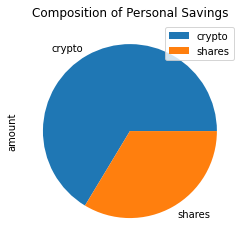

In [14]:
#Savings pie chart
df_savings.plot(kind='pie', y='amount', title='Composition of Personal Savings')

In [15]:
# The ideal emergency fund
emergency_fund = monthly_income * 3

# Total amount of savings
total_savings = crypto_amount + shares_amount
dollars_away = emergency_fund - total_savings

# Validating saving health points
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print("Congratulations! you have reached at a stage to have an equal amount of money as needed for emergency funds"),
else:
    print("You are " + str(dollars_away) + " away from reaching the fianancial goal of having enough emergency funds")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Setting  start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Getting 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-10 00:00:00-04:00  108.60  108.6600  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153.0   
...                           ...       ...       ...      ...        ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500  5160765.0   

                              SPY                                         
                             open    high       low    close      volume  
time                                                                      
2017-05-10 00:00:00-04:00     NaN     NaN       NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.1300  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.6700  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.4500  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.6300  240.100  37206183.0  
...                           ...     ...       ...      ...         ...  
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.640  44689009.0  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.480  45962264.0  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.350  45533863.0  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.990  70607144.0  
2021-04-30 00:00:00-04:00  417.63  418.54  416.3400  417.300  73129109.0  

[1001 rows x 10 columns]

In [18]:
#A Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
portfolio_data = df_stock_data,
weights = [.40,.60],    
num_simulation = 500,
num_trading_days = 252*30,
)

In [19]:
# Printing the simulation input data
MC_30year.portfolio_data.dropna().head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00   35283567.0    -0.001587  
2017-05-15 00:00:00-04:00   42230620.0     0.005083  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\Financial_Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006205,1.004546,1.016196,0.993285,0.999515,0.988749,1.020121,0.992404,1.004683,1.001528,...,0.995870,1.001137,0.998307,0.994632,1.005004,1.001247,1.006878,0.999681,0.998235,1.005971
2,1.013147,1.008219,1.018203,0.985877,1.006450,0.992500,1.046468,1.001785,1.016213,1.019888,...,0.987603,1.002225,1.002016,1.001707,0.997484,0.999083,0.998951,0.991206,0.999343,0.999793
3,1.010123,1.015547,1.009480,0.992571,0.999714,0.995844,1.043733,1.000831,1.015124,1.025738,...,0.993098,1.009554,0.996975,0.991427,1.008400,0.987893,1.000020,0.992738,1.011605,1.011165
4,1.013935,1.010785,0.997176,0.994417,0.999167,0.987130,1.042465,0.998171,1.012926,1.020889,...,0.987308,1.014175,0.985084,0.994401,1.016317,0.996073,1.000011,0.994791,1.019260,1.008829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.458121,27.727991,45.312045,71.078233,22.889834,13.861984,49.365755,16.848307,17.793616,18.480933,...,16.455109,48.376506,13.654815,6.285854,21.341105,17.148870,10.998415,25.654216,7.019992,4.077865
7557,11.277712,27.796773,45.660929,71.271982,22.712758,13.878892,49.495509,16.875664,17.862199,18.157840,...,16.414505,48.716202,13.681027,6.360507,21.351310,17.141594,10.967381,25.602574,7.089882,4.147516
7558,11.143701,27.775907,45.693693,71.151940,22.789182,13.818102,49.460355,16.829635,17.885911,18.143825,...,16.400746,49.071329,13.418205,6.392558,21.329687,17.276975,11.013379,25.511080,7.176566,4.155359
7559,11.121126,28.021944,46.103874,70.284841,22.869489,13.723533,49.446169,16.925715,18.098935,18.086101,...,16.451088,48.560127,13.225684,6.421785,21.510121,17.360723,10.903253,25.783802,7.230455,4.163362


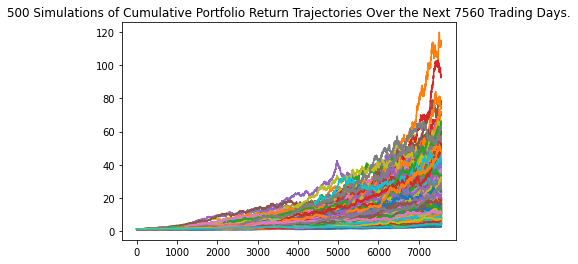

In [21]:
# Plotting simulation outcomes
line_plot = MC_30year.plot_simulation()

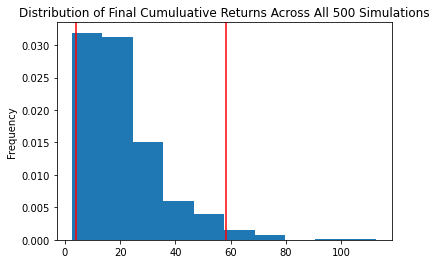

In [22]:
# Plotting probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetching summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Returning summary statistics
tbl

count           500.000000
mean             21.241730
std              14.690079
min               2.517405
25%              11.247088
50%              16.750858
75%              27.975465
max             112.792648
95% CI Lower      4.094844
95% CI Upper     58.416919
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Setting intial investment 
initial_investment = 20000

# The lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(tbl[9]*20000,2)
ci_lower = round(tbl[8]*20000,2)

# Executing resuts
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $81896.89 and $1168338.37


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Setting initial investment at 50% increase 
initial_investment = 20000 * 1.5

# The lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(tbl[9]*initial_investment,2)
ci_lower = round(tbl[8]*initial_investment,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $122845.33 and $1752507.56


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
portfolio_data = df_stock_data,
weights = [.40,.60],    
num_simulation = 500,
num_trading_days = 252*5,
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\Financial_Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997526,0.995788,0.999490,1.008269,0.997292,0.991581,1.007231,0.990927,1.005585,1.007618,...,1.001672,1.005086,0.994294,0.989300,0.998707,0.997886,0.998727,0.991380,1.011648,1.020836
2,0.995720,0.984111,0.994920,1.012125,0.999082,0.994650,1.003249,1.004496,1.004105,1.016962,...,0.994514,1.006564,0.989195,1.006004,0.996097,0.982246,0.998667,0.999815,1.023800,1.008675
3,0.998434,0.991800,0.993431,1.020626,1.010913,0.993909,0.995003,0.997962,0.994594,1.007542,...,0.982610,1.012785,0.995941,1.005603,0.990110,0.977524,0.989640,0.991588,1.021886,1.014773
4,1.007037,1.000950,1.006211,1.029518,1.017445,0.984016,1.009213,0.990691,0.997315,0.996631,...,0.976638,1.024335,1.004048,1.019689,0.980133,0.970524,0.979761,0.977555,1.024384,1.008205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.253343,1.541044,1.886415,1.085160,1.594251,1.510432,1.919981,0.980855,1.787696,1.797079,...,2.652475,1.716821,1.035816,1.824294,1.918294,2.771888,1.625645,1.080769,2.286389,1.356320
1257,1.265822,1.548963,1.890078,1.082634,1.590569,1.503403,1.910254,0.981728,1.775212,1.790518,...,2.648355,1.734051,1.049367,1.795793,1.908779,2.755159,1.627132,1.068548,2.298476,1.357125
1258,1.254659,1.543711,1.881953,1.093461,1.577538,1.506991,1.929094,0.984744,1.765033,1.776128,...,2.682156,1.743395,1.039734,1.819730,1.907129,2.744085,1.651083,1.075886,2.336069,1.350938
1259,1.257385,1.524488,1.890963,1.106203,1.588568,1.527074,1.946785,0.995886,1.772234,1.761862,...,2.645508,1.763952,1.041271,1.842017,1.929889,2.783392,1.657816,1.065610,2.344235,1.364401


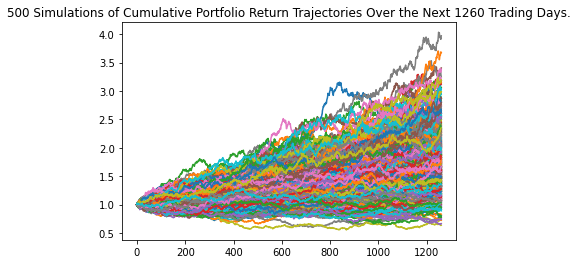

In [28]:
# Ploting simulation outcomes for 5 years
line_plot_5 = MC_5year.plot_simulation()

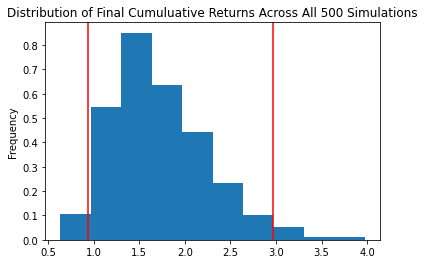

In [29]:
# Plotting probability distribution and confidence intervals for 5 years
dist_plot_5 = MC_5year.plot_distribution()

In [30]:
# Fetching summary statistics from the Monte Carlo simulation results for 5 years
tbl_5 = MC_5year.summarize_cumulative_return()

# Generating summary statistics for 5 years
tbl_5

count           500.000000
mean              1.722051
std               0.531160
min               0.635522
25%               1.330735
50%               1.630259
75%               2.024652
max               3.972464
95% CI Lower      0.934130
95% CI Upper      2.963816
Name: 1260, dtype: float64

In [31]:
# Setting increased initial investment for 5 years
initial_investment = 60000

# The lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_5_upper = round(tbl_5[9]*60000,2)
ci_5_lower = round(tbl_5[8]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_5_lower} and ${ci_5_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56047.78 and $177828.94


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
portfolio_data = df_stock_data,
weights = [.40,.60],    
num_simulation = 500,
num_trading_days = 252*10,
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\Financial_Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983201,0.990724,1.004329,1.004410,1.006338,1.008860,0.989017,1.001305,1.009415,1.001281,...,1.003547,1.011340,1.013113,0.999767,1.003840,1.008522,0.998816,0.987696,0.999508,1.003703
2,0.978379,0.975104,0.997331,1.008048,1.012567,1.010988,0.994211,1.005301,1.014766,0.987936,...,1.008780,1.003048,1.018981,1.009814,0.998241,1.008671,0.997671,0.991755,1.014807,0.990846
3,0.976888,0.971562,0.989493,1.009207,1.015973,1.019213,0.997139,1.006308,1.002785,0.965725,...,1.011309,1.003096,1.020876,1.006587,0.994357,1.011161,1.004920,0.991135,1.000212,0.994458
4,0.970784,0.974738,0.988459,1.020232,1.013210,1.035861,0.998555,0.999355,0.992387,0.975582,...,1.014294,1.002576,1.016625,1.008686,0.976017,1.018506,1.020782,0.996688,1.011709,0.988059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.970280,1.748066,3.063635,4.089359,1.401397,1.788940,1.989879,4.466304,4.668635,2.236552,...,1.147631,2.989654,6.441943,2.066043,4.666065,2.837969,3.471798,3.556513,1.747258,3.015882
2517,0.964521,1.758900,3.075804,4.085451,1.398112,1.785478,2.017507,4.489971,4.712514,2.241367,...,1.148162,3.019458,6.475631,2.056120,4.695745,2.825925,3.506195,3.553237,1.760877,2.996895
2518,0.974692,1.745572,3.062921,4.108936,1.408318,1.795990,2.005119,4.496338,4.637191,2.259043,...,1.145507,2.986215,6.462231,2.055874,4.661186,2.796360,3.484943,3.566685,1.742691,2.976213
2519,0.979491,1.751933,3.063683,4.159331,1.398743,1.820285,2.011197,4.496046,4.667830,2.262671,...,1.149298,2.970018,6.534362,2.060714,4.658999,2.808957,3.505503,3.589472,1.732495,2.985618


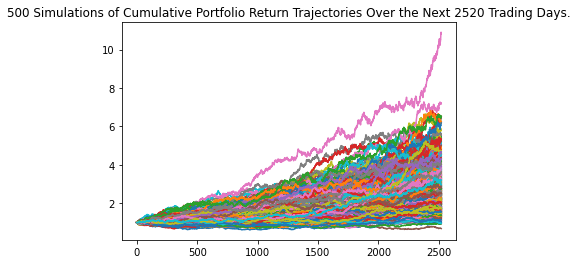

In [34]:
# Plot simulation outcomes
line_plot_10 = MC_10year.plot_simulation()

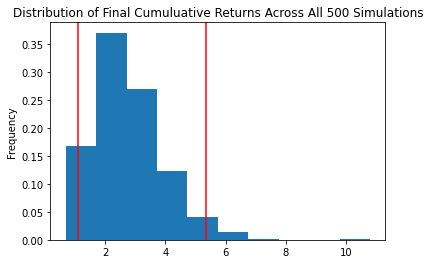

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_10year.summarize_cumulative_return()

# Print summary statistics
tbl_10

count           500.000000
mean              2.782743
std               1.187503
min               0.681789
25%               1.932571
50%               2.577245
75%               3.416568
max              10.800813
95% CI Lower      1.102872
95% CI Upper      5.358555
Name: 2520, dtype: float64

In [37]:
# Setting increased initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_10_upper = round(tbl_10[9]*60000,2)
ci_10_lower = round(tbl_10[8]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_10_lower} and ${ci_10_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66172.3 and $321513.32
